**Worksheet_1: End-to-end Machine Learning project**<br/>
In this worksheet we will work with an Automobile Data Set to try and predict the price of a car based on a bunch of features

## Look at Big Picture:
it is always good to know what is the goal of the project you are working on so you can better make dessitions about the type of output you are looking for(i.e. regression, classification), and what methods you should use(i.e.supervised, unsupervised, RL).<br/>
In this case the goal of this Project is to predict the numerical value of a diamond given some atributes, lets look at the data set and see what we are dealing with

## Get the Data


### Attribute Information:
price price in US dollars (\$326 — \$18,823)

carat weight of the diamond (0.2–5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0–10.74)

y width in mm (0–58.9)

z depth in mm (0–31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)

table width of top of diamond relative to widest point (43–95)

In [1]:
import pandas as pd

In [2]:
import seaborn as sns


In [3]:
diamond=sns.load_dataset('diamonds', cache=True, data_home=None)

Problem 1.1: Take a quick look at the data
- take a look at the first few lines of the data
- check if any data is missing/ the data types
- check the min max mean std of the numerical data
- make histagram of all the data

In [4]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


seems like there is no missing data, but we will still deal with the case were there is missing data incase you get a new instance with missing data

In [6]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec4b35a610>,
      dtype=object)

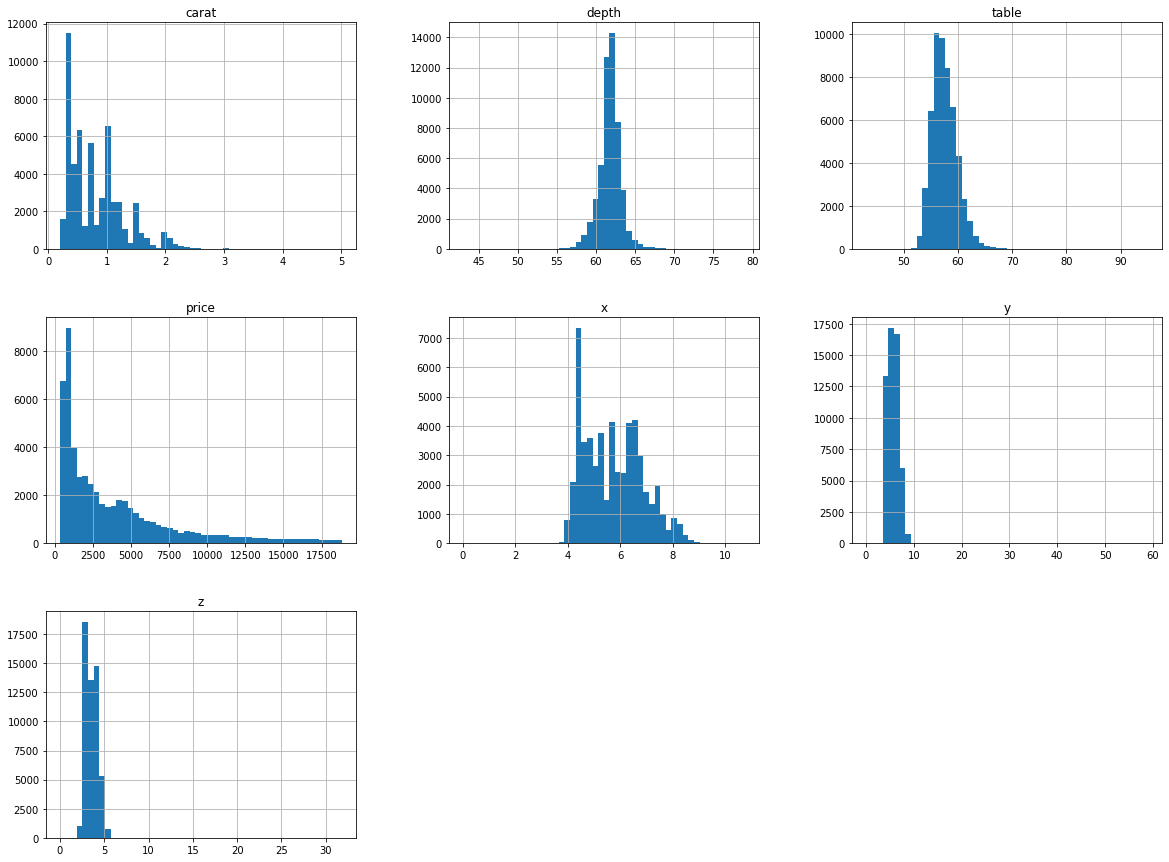

In [7]:
diamond.hist(bins=50, figsize=(20,15))

some things to notice:
1. seems like price and carat size is correlated a lot, we will look at it closer in the next sections
2. the scales are very diffrent 
3. a lot of the hists are tail heavy and we might have to make them look more normal later so it will be easier for the ML model to learn

## Make test set
we make a test set so we dont over fit the model, meaning if we had no test set the model would do very well on the data it was trained on but it would do a lot worse if given an out of sample exaple.

problem 2: split data into test set and training set (there is more then one way to do this)

In [8]:
# there are other ways to do this in the book but I find this gets the best results easiest,
# it randomly splits the data into two parts 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(diamond, test_size=0.2, random_state=42)


## Discover and Visualize the Data to Gain Insights


In [9]:
diamond = train_set.copy()


In [10]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
26546,2.01,Good,F,SI2,58.1,64.0,16231,8.23,8.19,4.77
9159,1.01,Very Good,E,SI2,60.0,60.0,4540,6.57,6.49,3.92
14131,1.10,Premium,H,VS2,62.5,58.0,5729,6.59,6.54,4.10
15757,1.50,Good,E,SI2,61.5,65.0,6300,7.21,7.17,4.42
24632,1.52,Very Good,G,VS1,62.1,57.0,12968,7.27,7.32,4.53
...,...,...,...,...,...,...,...,...,...,...
11284,1.05,Very Good,I,VS2,62.4,59.0,4975,6.48,6.51,4.05
44732,0.47,Ideal,D,VS1,61.0,55.0,1617,5.03,5.01,3.06
38158,0.33,Very Good,F,IF,60.3,58.0,1014,4.49,4.46,2.70
860,0.90,Premium,J,SI1,62.8,59.0,2871,6.13,6.03,3.82


Problem 3: make some graphs to learn more about the data

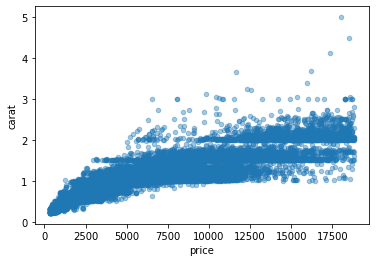

In [11]:
diamond.plot.scatter(x='price', y='carat',alpha=.4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec4baa9cd0>,
      dtype=object)

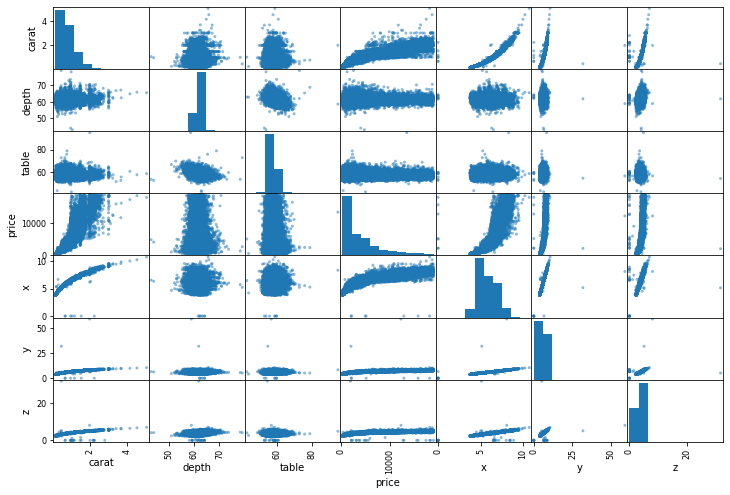

In [12]:
%matplotlib inline

from pandas.plotting import scatter_matrix
scatter_matrix(diamond, figsize=(12, 8))


problem 4: what are the most and least correlated features to price

In [13]:
corr_matrix = diamond.corr()


In [14]:
# this only checks for linear correlation
corr_matrix['price'].sort_values(ascending=False)

price    1.000000
carat    0.921641
x        0.884243
y        0.860110
z        0.856940
table    0.123076
depth   -0.005583
Name: price, dtype: float64

### Test out diffent Attribute combinations
after looking at the data try and make some of your own features by combining the features given to you in the data set

problem 5: try and come up with your own features and check its correlation compaired to price

In [15]:
diamond['x_y_z'] = .4*diamond['x'] + .3 * diamond['y'] + .3 * diamond['z']

In [16]:
corr_matrix = diamond.corr()


In [17]:
corr_matrix['price'].sort_values(ascending=False)

price    1.000000
carat    0.921641
x        0.884243
x_y_z    0.880946
y        0.860110
z        0.856940
table    0.123076
depth   -0.005583
Name: price, dtype: float64

x seems to be more correlated then y and z, and is highly correlated to y and z so I would probably remove y and z because it is not adding much to the results

## Prepare the Data for Machine Learning Algorithms
- its best to build a transformer pipeline so we could use it in training and in testing/production

In [18]:
# first lets go back to the old data
diamond = train_set.drop('price', axis=1)
diamond_price = train_set['price'].copy()

### Data Cleaning
most data sets are missing features so we will have to make functions to deal with this
1. drop the entire column
2. replace missing values with mean or zero

Problem 6: use sklearns Simple Imputer to replace missing values with median value for numerical features

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imputer = SimpleImputer(strategy='median')

In [22]:
diamond_num = diamond.drop(['cut','color','clarity'], axis=1)

In [23]:
imputer.fit(diamond_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [24]:
imputer.statistics_

array([ 0.7 , 61.8 , 57.  ,  5.7 ,  5.71,  3.53])

In [25]:
X = imputer.transform(diamond_num)

In [26]:
X

array([[ 2.01, 58.1 , 64.  ,  8.23,  8.19,  4.77],
       [ 1.01, 60.  , 60.  ,  6.57,  6.49,  3.92],
       [ 1.1 , 62.5 , 58.  ,  6.59,  6.54,  4.1 ],
       ...,
       [ 0.33, 60.3 , 58.  ,  4.49,  4.46,  2.7 ],
       [ 0.9 , 62.8 , 59.  ,  6.13,  6.03,  3.82],
       [ 1.14, 60.4 , 58.  ,  6.82,  6.79,  4.11]])

### Text and Categorical Attributes
ML models can not take in text data so there are a few way we can convert the text data to numbers
1. just make each category a number (i.e. cat = 1 shoe = 2)
    - the issue with this is that shoe means it is twice cat and that just makes no sense 
2. one hot encoder: make one attribute equal to 1 and the rest 0
3. embedding: embeds text as an array of values that has meaning to it(will learn about in later chapter)

**Problem 7**: make one hot encoding for all categorical features<br/>
Hint: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [28]:
diamond
diamond_cat = diamond[["cut",'color','clarity']]


In [29]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
diamond_cat_1hot = cat_encoder.fit_transform(diamond_cat)
diamond_cat_1hot

<43152x20 sparse matrix of type '<class 'numpy.float64'>'
	with 129456 stored elements in Compressed Sparse Row format>

In [32]:
diamond_cat_1hot.toarray()[0]


array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0.])

### Feature Scaling
many ML algos dont work so well if the scales of the input very different so it is common to scale features before training, two methods for that are
1. min max scaling
2. standardization
    - unlike min max scaling standardization does not bound values, and standardization is much less affected by outliers

### Transformation Pipeline

**Problem 8:** create a sklearn pipeline to deal with numerical missing values, and scaling 

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
diamond_num_tr = num_pipeline.fit_transform(diamond_num)


In [34]:
diamond_num_tr

array([[ 2.56005606, -2.55074762,  2.93386055,  2.22945022,  2.13820916,
         1.73820671],
       [ 0.44739205, -1.22042647,  1.13957453,  0.74754991,  0.65671016,
         0.5377332 ],
       [ 0.63753181,  0.52999608,  0.24243153,  0.76540413,  0.70028366,
         0.79195112],
       ...,
       [-0.98921948, -1.01037577,  0.24243153, -1.10928903, -1.11237394,
        -1.18529936],
       [ 0.21499901,  0.74004679,  0.69100303,  0.35475706,  0.25583396,
         0.39650102],
       [ 0.72203837, -0.94035886,  0.24243153,  0.97072767,  0.91815116,
         0.80607434]])

**Problem 9:** make a pipeline that deals with num data and that converts categorical data to one hot encoding

In [35]:
from sklearn.compose import ColumnTransformer

num_attribs = list(diamond_num)
cat_attribs = ["cut",'color','clarity']

In [36]:


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

diamond_prepared = full_pipeline.fit_transform(diamond)

In [37]:
diamond_prepared

array([[ 2.56005606, -2.55074762,  2.93386055, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.44739205, -1.22042647,  1.13957453, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63753181,  0.52999608,  0.24243153, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.98921948, -1.01037577,  0.24243153, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.21499901,  0.74004679,  0.69100303, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.72203837, -0.94035886,  0.24243153, ...,  0.        ,
         0.        ,  0.        ]])

## Select and Train a Model
in this section we will go over how to decide if a model is good 

### Train models

**Problem 10:** train a linear model and check how it does on the training set (get the MSE)

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(diamond_prepared, train_set['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# let's try the full preprocessing pipeline on a few training instances
some_data = train_set.iloc[:5]
some_labels = train_set['price'].iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [13968.5241666   4600.4810862   6292.58737644  9073.49611448
 11167.07228422]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [45]:
list(some_labels)

[16231, 4540, 5729, 6300, 12968]

In [47]:
import numpy as np
from sklearn.metrics import mean_squared_error

diamond_predictions = lin_reg.predict(diamond_prepared)
lin_mse = mean_squared_error(train_set['price'], diamond_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1128.5697163572002

your MSE should be around 1,128 (it might not be exactly the same as mine

this is a good result but lets see what happens if we train a stronger model

**Problem 11:** train a decision tree and get the MSE

In [48]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(diamond_prepared, train_set['price'])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [50]:
diamond_predictions = tree_reg.predict(diamond_prepared)
tree_mse = mean_squared_error(train_set['price'], diamond_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

9.067323921015339

while this might look really good we are overfitting the training set, and this model will not do well on data not in the training set. So in the next part we will go over how to deal with this issue so you can choose the best model available